<a href="https://colab.research.google.com/github/sawible/AHHHHHHHHHHH/blob/main/rotCurveMilkyWay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import astropy.constants as ac
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M_galacticBulge = 10000000000 * u.solMass # define the mass of the galactic bulge in units of solar masses
R_galacticBulge = 6500 * u.lyr # define the radius of the galactic bulge in units of light years
R_parsec = (np.arange(1,31) * u.kpc) # define the array of radii in units of kilo[parsecs]

$V = \sqrt\frac{GM}{R}$

In [3]:
def calcOrbitalVelocity(M, R):
  """
  This is a function that calculates the orbital velocity
  Input:
  M, the mass of the central object
  R, the orbtial radius
  Output:
  orbitalVelocity, the orbital velocity
  """
  orbitalVelocity = np.sqrt(ac.G * M / R)
  return orbitalVelocity

In [4]:
V_galactic = calcOrbitalVelocity(M_galacticBulge, R_parsec) # calculating orbital velocity using the mass of a galactic bulge

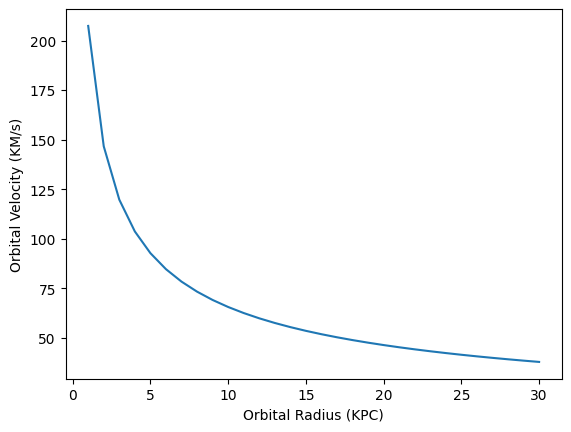

In [5]:
plt.plot(R_parsec.to(u.kpc), V_galactic.to(u.km/u.s))
plt.xlabel("Orbital Radius (KPC)".format(R_parsec.unit))
plt.ylabel("Orbital Velocity (KM/s)".format(V_galactic.unit))
plt.show()

$ Menc = \pi * R^2 * density$

In [6]:
def calcEncMassDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [7]:
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

318.3098861837907 1e+06 solMass / kpc2


In [8]:
v_bulge_arr = calcOrbitalVelocity(M_galacticBulge, R_parsec) # Orbital velocity of the galactic bulge

In [14]:
def calcEncMassSphere(R, density):
    # Enclosed mass of a sphere
    M = (4/3) * np.pi * (R**3) * density
    return(M)

In [39]:
def calcVolSphere(R):
    # Volume of a sphere
    V = 4/3 * np.pi * (R**3)
    return(V)

In [80]:
def calcEncMassMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass, M_halo = 1e12 * u.solMass, density_halo = 1909859*u.solMass/u.kpc**3):
    # Total mass
    M_disk = calcEncMassDisk(R, density=density_disk)
    M_halo = calcEncMassSphere(R, density=density_halo)
    M_total = M_disk + M_bulge + M_halo
    return(M_total)

In [66]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_parsec)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_parsec)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_parsec)):
    M_disk[i] = calcEncMassDisk(R_parsec[i])
    M_total[i] = calcEncMassMilkyWay(R_parsec[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calcOrbitalVelocity(M_disk, R_parsec)
v_total_arr = calcOrbitalVelocity(M_total, R_parsec)

In [67]:
M_halo = 1e12 * u.solMass # Define mass of the halo in solar masses
R_halo = 50 * u.kpc # Define radius of halo
density_halo = M_halo / (calcVolSphere(R_halo)) # here the density is in the unit of solar mass / kpc^3
print(density_halo)

1909859.3171027442 solMass / kpc3


In [73]:
M_arr_halo = calcEncMassSphere(R_halo, density_halo) # Calculating enclosed mass of the halo based on radius and density
v_halo = calcOrbitalVelocity(M_arr_halo, R_parsec.to(u.m)) # Calculating orbital velocity of the halo
print(v_halo.to(u.km/u.s))

[2073.86529698 1466.44421477 1197.34668748 1036.93264849  927.46075605
  846.65196215  783.84740407  733.22210738  691.28843233  655.81378989
  625.29391417  598.67334374  575.18674359  554.26381483  535.46971717
  518.46632425  502.98621605  488.81473826  475.77732906  463.73037802
  452.55450974  442.14956694  432.43080723  423.32598107  414.7730594
  406.71844684  399.11556249  391.92370203  385.10711766  378.63426813] km / s


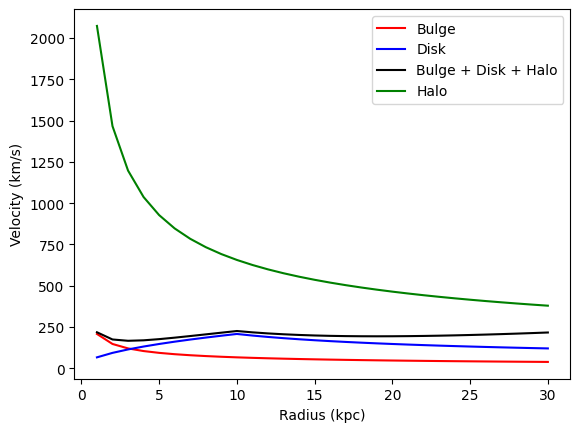

In [81]:
plt.plot(R_parsec.to(u.kpc), V_galactic.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_parsec.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_parsec.to(u.kpc), v_total_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.plot(R_parsec.to(u.kpc), v_halo.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

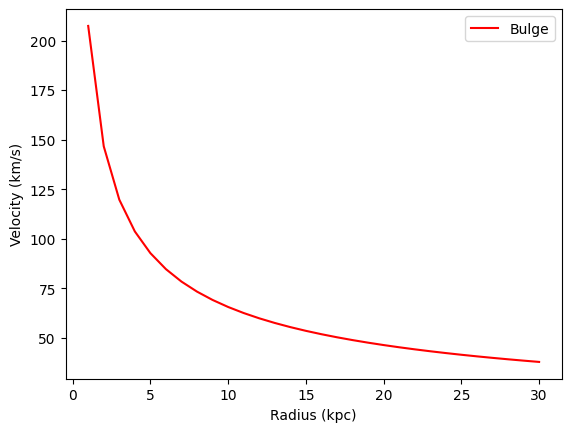

In [82]:
plt.plot(R_parsec.to(u.kpc), V_galactic.to(u.km/u.s), color="red", label="Bulge") # bulge
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

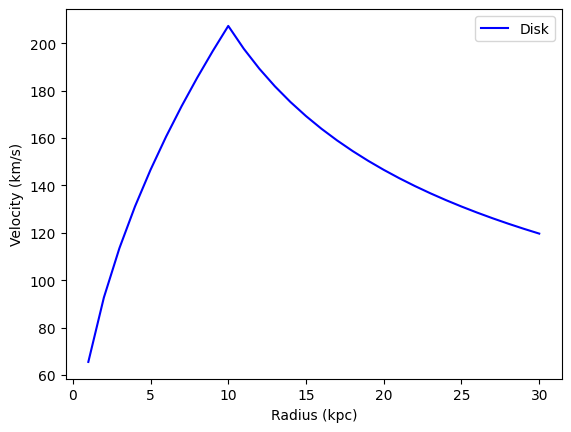

In [84]:
plt.plot(R_parsec.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

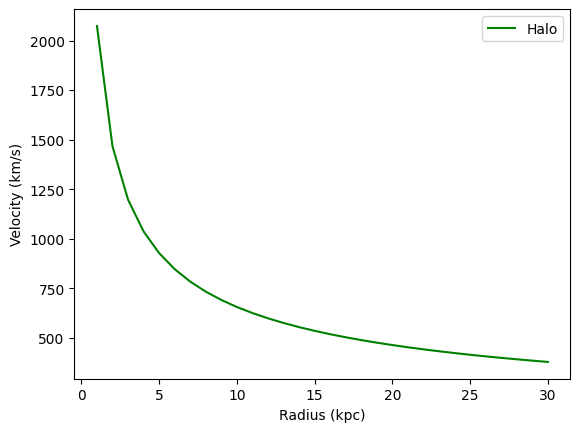

In [85]:
plt.plot(R_parsec.to(u.kpc), v_halo.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

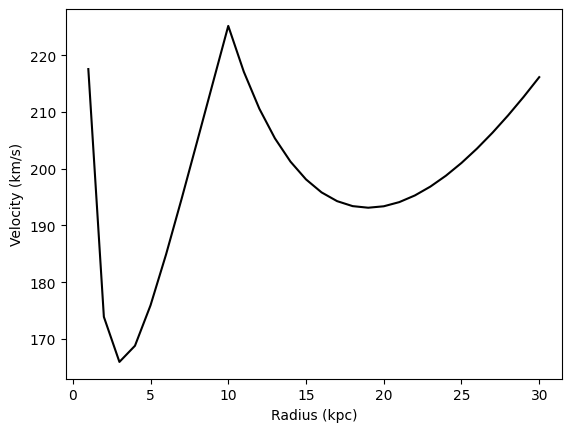

In [78]:
plt.plot(R_parsec.to(u.kpc), v_total_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')

plt.show()